In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 200)


In [2]:
# Custom imports

from data_helper import load_data, load_true_labels, add_binary_true_labels_to_dataset, add_labels_to_dataset

In [3]:
# PATHS - Change these to use different data from the dataset!

# russellmitchell | inet-firewall | dnsmasq.log
path_data = "../../AIT_LD-v2/russellmitchell"
path_log_file = "/gather/inet-firewall/logs/dnsmasq.log"
path_true_labels_file = "/labels/inet-firewall/logs/dnsmasq.log"

In [4]:
# Load the AIT log data set v2
df_raw = load_data(path_data + path_log_file)

# Display the first few rows of the data set
#df_raw.head(5)

# Display the entries corresponding to attack (rows 144-151)
print(df_raw.iloc[144:152][0].to_string())

144                           Jan 21 00:04:43 dnsmasq[3468]: cached e6410.d.akamaiedge.net is NODATA-IPv6
145                    Jan 21 00:04:43 dnsmasq[3468]: query[AAAA] e6410.d.akamaiedge.net from 10.143.1.78
146                           Jan 21 00:04:43 dnsmasq[3468]: cached e6410.d.akamaiedge.net is NODATA-IPv6
147                    Jan 21 00:04:43 dnsmasq[3468]: query[AAAA] e6410.d.akamaiedge.net from 10.143.1.78
148                           Jan 21 00:04:43 dnsmasq[3468]: cached e6410.d.akamaiedge.net is NODATA-IPv6
149                    Jan 21 00:04:43 dnsmasq[3468]: query[AAAA] e6410.d.akamaiedge.net from 10.143.1.78
150                           Jan 21 00:04:43 dnsmasq[3468]: cached e6410.d.akamaiedge.net is NODATA-IPv6
151    Jan 21 00:04:43 dnsmasq[3468]: query[A] static-whale.pstatic.net.static.gscdn.net from 10.143.1.78


In [5]:
# load true labels from json
df_true_labels = load_true_labels(path_data + path_true_labels_file)

df_true_labels.head(10)

,line,labels,rules
0,1,"[dnsteal, attacker, dnsteal-received]","{'dnsteal': ['dnsteal.domain.match'], 'attacker': ['dnsteal.domain.match'], 'dnsteal-received': ['dnsteal.domain.received']}"
1,2,"[dnsteal, attacker, dnsteal-received]","{'dnsteal': ['dnsteal.domain.match'], 'attacker': ['dnsteal.domain.match'], 'dnsteal-received': ['dnsteal.domain.received']}"
2,3,"[dnsteal, attacker, dnsteal-received]","{'dnsteal': ['dnsteal.domain.match'], 'attacker': ['dnsteal.domain.match'], 'dnsteal-received': ['dnsteal.domain.received']}"
3,4,"[dnsteal, attacker, dnsteal-received]","{'dnsteal': ['dnsteal.domain.match'], 'attacker': ['dnsteal.domain.match'], 'dnsteal-received': ['dnsteal.domain.received']}"
4,5,"[dnsteal, attacker, dnsteal-received]","{'dnsteal': ['dnsteal.domain.match'], 'attacker': ['dnsteal.domain.match'], 'dnsteal-received': ['dnsteal.domain.received']}"
5,6,"[dnsteal, attacker, dnsteal-received]","{'dnsteal': ['dnsteal.domain.match'], 'attacker': ['dnsteal.domain.match'], 'dnsteal-received': ['dnsteal.domain.received']}"
6,7,"[dnsteal, attacker, dnsteal-received]","{'dnsteal': ['dnsteal.domain.match'], 'attacker': ['dnsteal.domain.match'], 'dnsteal-received': ['dnsteal.domain.received']}"
7,8,"[dnsteal, attacker, dnsteal-received]","{'dnsteal': ['dnsteal.domain.match'], 'attacker': ['dnsteal.domain.match'], 'dnsteal-received': ['dnsteal.domain.received']}"
8,9,"[dnsteal, attacker, dnsteal-received]","{'dnsteal': ['dnsteal.domain.match'], 'attacker': ['dnsteal.domain.match'], 'dnsteal-received': ['dnsteal.domain.received']}"
9,10,"[dnsteal, attacker, dnsteal-received]","{'dnsteal': ['dnsteal.domain.match'], 'attacker': ['dnsteal.domain.match'], 'dnsteal-received': ['dnsteal.domain.received']}"


In [6]:
# Check for null values
df_raw.isnull().sum()

0    0
dtype: int64

In [7]:
# Check for duplicates
# 1. santos | inet-firewall | dnsmasq.log               duplicates: 68286, isnull: true_type: 236241, labels: 236241

df_raw.duplicated().sum()

82123

In [8]:
df_raw.rename(columns={0: "message"}, inplace=True)
df_raw

,message
0,Jan 21 00:00:09 dnsmasq[3468]: query[A] 3x6-.596-.IunWTzebVlyAhhHj*ZfWjOBun1zAf*Wgpq-.YarqcF7oovex5JXZQp35nThgDU1Q3p3lT/-.DM6Vx/vcq3AkrO4Xh2kjojk8RCiDE2wjSv-.gY6ONv8eNmDck8gGwJ8fU3PPctbthfeDZT-.cu...
1,Jan 21 00:00:09 dnsmasq[3468]: forwarded 3x6-.596-.IunWTzebVlyAhhHj*ZfWjOBun1zAf*Wgpq-.YarqcF7oovex5JXZQp35nThgDU1Q3p3lT/-.DM6Vx/vcq3AkrO4Xh2kjojk8RCiDE2wjSv-.gY6ONv8eNmDck8gGwJ8fU3PPctbthfeDZT-.c...
2,Jan 21 00:00:09 dnsmasq[3468]: reply 3x6-.596-.IunWTzebVlyAhhHj*ZfWjOBun1zAf*Wgpq-.YarqcF7oovex5JXZQp35nThgDU1Q3p3lT/-.DM6Vx/vcq3AkrO4Xh2kjojk8RCiDE2wjSv-.gY6ONv8eNmDck8gGwJ8fU3PPctbthfeDZT-.custo...
3,Jan 21 00:00:31 dnsmasq[3468]: query[A] 3x6-.597-.L**fA/ib4pGEIb5*uJ223L5A/pWGilEyrR-.u9lQ3wFEj1tPwCHh73wG6GKKEMkqDT/d*3-.LvX0RzIuTHdNz11Xyw21NB8jaa8CNw7CaC-.yai016WDS1Ypa5Tr/uckb0Hv2k9C1eU7Og-.cu...
4,Jan 21 00:00:31 dnsmasq[3468]: forwarded 3x6-.597-.L**fA/ib4pGEIb5*uJ223L5A/pWGilEyrR-.u9lQ3wFEj1tPwCHh73wG6GKKEMkqDT/d*3-.LvX0RzIuTHdNz11Xyw21NB8jaa8CNw7CaC-.yai016WDS1Ypa5Tr/uckb0Hv2k9C1eU7Og-.c...
...,...
275895,Jan 24 23:55:43 dnsmasq[3468]: query[A] e6410.d.akamaiedge.net from 10.143.1.78
275896,Jan 24 23:55:43 dnsmasq[3468]: forwarded e6410.d.akamaiedge.net to 192.168.231.254
275897,Jan 24 23:55:43 dnsmasq[3468]: reply e6410.d.akamaiedge.net is 2.18.168.196
275898,Jan 24 23:58:27 dnsmasq[3468]: query[AAAA] mail from 172.19.130.4


In [9]:
# Parse the log lines into a structured format using regex

import re
import pandas as pd

# Parse the log lines and match them to their message type using manually defined regular expressions
def parse_log(log_lines):
    data = []

    # Regular expressions for each type of log line

    # Query patterns
    query_a_pattern = re.compile(
        r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
        r'dnsmasq\[\d+\]: query\[A\] '
        r'(?P<domain>[^\s]+) '
        r'from (?P<src_ip>[^\s]+)'
    )
    query_aaaa_pattern = re.compile(
        r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
        r'dnsmasq\[\d+\]: query\[AAAA\] '
        r'(?P<domain>[^\s]+) '
        r'from (?P<src_ip>[^\s]+)'
    )
    query_srv_pattern = re.compile(
        r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
        r'dnsmasq\[\d+\]: query\[SRV\] '
        r'(?P<domain>[^\s]+) '
        r'from (?P<src_ip>[^\s]+)'
    )
    query_txt_pattern = re.compile(
        r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
        r'dnsmasq\[\d+\]: query\[TXT\] '
        r'(?P<domain>[^\s]+) '
        r'from (?P<src_ip>[^\s]+)'
    )
    query_ptr_pattern = re.compile(
    r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
    r'dnsmasq\[\d+\]: query\[PTR\] '
    r'(?P<domain>[^\s]+) '
    r'from (?P<src_ip>[^\s]+)$'
    )
    query_mx_pattern = re.compile(
    r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
    r'dnsmasq\[\d+\]: query\[MX\] '
    r'(?P<domain>[^\s]+) '
    r'from (?P<src_ip>[^\s]+)$'
    )
    
    # Forwarded pattern
    forwarded_pattern = re.compile(
        r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
        r'dnsmasq\[\d+\]: forwarded '
        r'(?P<domain>[^\s]+) '
        r'to (?P<dst_ip>[^\s]+)'
    )

    # Reply pattern
    reply_pattern = re.compile(
        r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
        r'dnsmasq\[\d+\]: reply '
        r'(?P<domain>[^\s]+) '
        r'is (?P<resolved_ip>[^\s]+)'
    )

    # Cached pattern
    cached_pattern = re.compile(
        r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
        r'dnsmasq\[\d+\]: cached '
        r'(?P<domain>[^\s]+) '
        r'is (?P<resolved_ip>[^\s]+)'
    )

    # Nameserver pattern
    nameserver_pattern = re.compile(
        r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) '
        r'dnsmasq\[\d+\]: nameserver '
        r'(?P<nameserver_ip>[^\s]+) '
        r'refused to do a recursive query$'
    )

    # Loop over every line in the log file and match it to a pattern
    for line in log_lines:
        #Query
        if match := query_a_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'query_a'
            data.append(match_data)
        elif match := query_aaaa_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'query_aaaa'
            data.append(match_data)
        elif match := query_srv_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'query_srv'
            data.append(match_data)
        elif match := query_txt_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'query_txt'
            data.append(match_data)
        elif match := query_ptr_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'query_ptr'
            data.append(match_data)
        elif match := query_mx_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'query_mx'
            data.append(match_data)

        #Forwarded
        elif match := forwarded_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'forwarded'
            data.append(match_data)
        
        #Reply
        elif match := reply_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'reply'
            data.append(match_data)
        
        #Cached
        elif match := cached_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'cached'
            data.append(match_data)

        #Nameserver
        elif match := nameserver_pattern.match(line):
            match_data = match.groupdict()
            match_data['message_type'] = 'nameserver'
            data.append(match_data)

        #Default
        else:
            print(f"Line does not match any pattern: {line}")

    df = pd.DataFrame(data)
    
    # Convert timestamp to a datetime object
    df['timestamp'] = pd.to_datetime('2022 ' + df['timestamp'], format='%Y %b %d %H:%M:%S', errors='coerce')
    df["message_type"] = df["message_type"].astype(str)
    
    return df

#Call parse_log function on df['raw'] to parse the log lines
#df_raw = parse_log(df_raw["message"])


In [10]:
import re
import pandas as pd
import numpy as np
from datetime import datetime

def extract_dns_features(log_lines):
    """Extract features from DNS logs focusing on domains and message types"""
    
    data = []
    
    # Regular expressions for each type of log line
    patterns = {
        'query_a': re.compile(r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) dnsmasq\[\d+\]: query\[A\] (?P<domain>[^\s]+)'),
        'query_aaaa': re.compile(r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) dnsmasq\[\d+\]: query\[AAAA\] (?P<domain>[^\s]+)'),
        'query_srv': re.compile(r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) dnsmasq\[\d+\]: query\[SRV\] (?P<domain>[^\s]+)'),
        'query_txt': re.compile(r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) dnsmasq\[\d+\]: query\[TXT\] (?P<domain>[^\s]+)'),
        'query_ptr': re.compile(r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) dnsmasq\[\d+\]: query\[PTR\] (?P<domain>[^\s]+)'),
        'query_mx': re.compile(r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) dnsmasq\[\d+\]: query\[MX\] (?P<domain>[^\s]+)'),
        'forwarded': re.compile(r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) dnsmasq\[\d+\]: forwarded (?P<domain>[^\s]+)'),
        'reply': re.compile(r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) dnsmasq\[\d+\]: reply (?P<domain>[^\s]+)'),
        'cached': re.compile(r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) dnsmasq\[\d+\]: cached (?P<domain>[^\s]+)'),
        'nameserver': re.compile(r'^(?P<timestamp>\w{3} \d{2} \d{2}:\d{2}:\d{2}) dnsmasq\[\d+\]: nameserver')  # No domain in nameserver messages
    }
    
    def extract_domain_features(domain):
        """Extract features from a domain name"""
        if pd.isna(domain):
            return {
                'domain_length': 0,
                'domain_parts': 0,
                'avg_part_length': 0,
                'max_part_length': 0,
                'special_char_count': 0,
                'numeric_char_count': 0,
                'alpha_char_count': 0,
                'entropy': 0
            }
            
        # Basic length features
        features = {
            'domain_length': len(domain),
            'domain_parts': len(domain.split('.')),
            'avg_part_length': np.mean([len(part) for part in domain.split('.')]),
            'max_part_length': max([len(part) for part in domain.split('.')]),
            'special_char_count': len(re.findall(r'[^a-zA-Z0-9\.]', domain)),
            'numeric_char_count': len(re.findall(r'[0-9]', domain)),
            'alpha_char_count': len(re.findall(r'[a-zA-Z]', domain))
        }
        
        # Calculate Shannon entropy
        char_freq = {}
        for char in domain:
            char_freq[char] = char_freq.get(char, 0) + 1
        entropy = 0
        for freq in char_freq.values():
            prob = freq / len(domain)
            entropy -= prob * np.log2(prob)
        features['entropy'] = entropy
        
        return features

    # Process each log line
    for line in log_lines:
        for msg_type, pattern in patterns.items():
            if match := pattern.match(line):
                entry = {
                    'message_type': msg_type,
                    'timestamp': match.group('timestamp')
                }
                
                # Add domain and its features if present in the pattern
                if 'domain' in pattern.groupindex:
                    domain = match.group('domain')
                    entry['domain'] = domain
                    entry.update(extract_domain_features(domain))
                else:
                    entry['domain'] = None
                    entry.update(extract_domain_features(None))
                    
                data.append(entry)
                break
    
    # Convert to DataFrame
    df = pd.DataFrame(data)
    
    # Convert timestamp to datetime and extract time features
    df['timestamp'] = pd.to_datetime('2022 ' + df['timestamp'], format='%Y %b %d %H:%M:%S')
    #df['hour'] = df['timestamp'].dt.hour
    #df['minute'] = df['timestamp'].dt.minute
    
    # Drop original timestamp and domain columns
    #df = df.drop(['timestamp', 'domain'], axis=1)
    
    return df

In [11]:
df_features_extracted = extract_dns_features(df_raw["message"])

df_features_extracted

,message_type,timestamp,domain,domain_length,domain_parts,avg_part_length,max_part_length,special_char_count,numeric_char_count,alpha_char_count,entropy
0,query_a,2022-01-21 00:00:09,3x6-.596-.IunWTzebVlyAhhHj*ZfWjOBun1zAf*Wgpq-.YarqcF7oovex5JXZQp35nThgDU1Q3p3lT/-.DM6Vx/vcq3AkrO4Xh2kjojk8RCiDE2wjSv-.gY6ONv8eNmDck8gGwJ8fU3PPctbthfeDZT-.customers_2017.xlsx.email-19.kennedy-mendo...,203,11,17.545455,35,13,30,150,5.768733
1,forwarded,2022-01-21 00:00:09,3x6-.596-.IunWTzebVlyAhhHj*ZfWjOBun1zAf*Wgpq-.YarqcF7oovex5JXZQp35nThgDU1Q3p3lT/-.DM6Vx/vcq3AkrO4Xh2kjojk8RCiDE2wjSv-.gY6ONv8eNmDck8gGwJ8fU3PPctbthfeDZT-.customers_2017.xlsx.email-19.kennedy-mendo...,203,11,17.545455,35,13,30,150,5.768733
2,reply,2022-01-21 00:00:09,3x6-.596-.IunWTzebVlyAhhHj*ZfWjOBun1zAf*Wgpq-.YarqcF7oovex5JXZQp35nThgDU1Q3p3lT/-.DM6Vx/vcq3AkrO4Xh2kjojk8RCiDE2wjSv-.gY6ONv8eNmDck8gGwJ8fU3PPctbthfeDZT-.customers_2017.xlsx.email-19.kennedy-mendo...,203,11,17.545455,35,13,30,150,5.768733
3,query_a,2022-01-21 00:00:31,3x6-.597-.L**fA/ib4pGEIb5*uJ223L5A/pWGilEyrR-.u9lQ3wFEj1tPwCHh73wG6GKKEMkqDT/d*3-.LvX0RzIuTHdNz11Xyw21NB8jaa8CNw7CaC-.yai016WDS1Ypa5Tr/uckb0Hv2k9C1eU7Og-.customers_2017.xlsx.email-19.kennedy-mendo...,203,11,17.545455,35,17,42,134,5.763903
4,forwarded,2022-01-21 00:00:31,3x6-.597-.L**fA/ib4pGEIb5*uJ223L5A/pWGilEyrR-.u9lQ3wFEj1tPwCHh73wG6GKKEMkqDT/d*3-.LvX0RzIuTHdNz11Xyw21NB8jaa8CNw7CaC-.yai016WDS1Ypa5Tr/uckb0Hv2k9C1eU7Og-.customers_2017.xlsx.email-19.kennedy-mendo...,203,11,17.545455,35,17,42,134,5.763903
...,...,...,...,...,...,...,...,...,...,...,...
275894,query_a,2022-01-24 23:55:43,e6410.d.akamaiedge.net,22,4,4.750000,10,0,4,15,3.572624
275895,forwarded,2022-01-24 23:55:43,e6410.d.akamaiedge.net,22,4,4.750000,10,0,4,15,3.572624
275896,reply,2022-01-24 23:55:43,e6410.d.akamaiedge.net,22,4,4.750000,10,0,4,15,3.572624
275897,query_aaaa,2022-01-24 23:58:27,mail,4,1,4.000000,4,0,0,4,2.000000


In [12]:
df_features_extracted

,message_type,timestamp,domain,domain_length,domain_parts,avg_part_length,max_part_length,special_char_count,numeric_char_count,alpha_char_count,entropy
0,query_a,2022-01-21 00:00:09,3x6-.596-.IunWTzebVlyAhhHj*ZfWjOBun1zAf*Wgpq-.YarqcF7oovex5JXZQp35nThgDU1Q3p3lT/-.DM6Vx/vcq3AkrO4Xh2kjojk8RCiDE2wjSv-.gY6ONv8eNmDck8gGwJ8fU3PPctbthfeDZT-.customers_2017.xlsx.email-19.kennedy-mendo...,203,11,17.545455,35,13,30,150,5.768733
1,forwarded,2022-01-21 00:00:09,3x6-.596-.IunWTzebVlyAhhHj*ZfWjOBun1zAf*Wgpq-.YarqcF7oovex5JXZQp35nThgDU1Q3p3lT/-.DM6Vx/vcq3AkrO4Xh2kjojk8RCiDE2wjSv-.gY6ONv8eNmDck8gGwJ8fU3PPctbthfeDZT-.customers_2017.xlsx.email-19.kennedy-mendo...,203,11,17.545455,35,13,30,150,5.768733
2,reply,2022-01-21 00:00:09,3x6-.596-.IunWTzebVlyAhhHj*ZfWjOBun1zAf*Wgpq-.YarqcF7oovex5JXZQp35nThgDU1Q3p3lT/-.DM6Vx/vcq3AkrO4Xh2kjojk8RCiDE2wjSv-.gY6ONv8eNmDck8gGwJ8fU3PPctbthfeDZT-.customers_2017.xlsx.email-19.kennedy-mendo...,203,11,17.545455,35,13,30,150,5.768733
3,query_a,2022-01-21 00:00:31,3x6-.597-.L**fA/ib4pGEIb5*uJ223L5A/pWGilEyrR-.u9lQ3wFEj1tPwCHh73wG6GKKEMkqDT/d*3-.LvX0RzIuTHdNz11Xyw21NB8jaa8CNw7CaC-.yai016WDS1Ypa5Tr/uckb0Hv2k9C1eU7Og-.customers_2017.xlsx.email-19.kennedy-mendo...,203,11,17.545455,35,17,42,134,5.763903
4,forwarded,2022-01-21 00:00:31,3x6-.597-.L**fA/ib4pGEIb5*uJ223L5A/pWGilEyrR-.u9lQ3wFEj1tPwCHh73wG6GKKEMkqDT/d*3-.LvX0RzIuTHdNz11Xyw21NB8jaa8CNw7CaC-.yai016WDS1Ypa5Tr/uckb0Hv2k9C1eU7Og-.customers_2017.xlsx.email-19.kennedy-mendo...,203,11,17.545455,35,17,42,134,5.763903
...,...,...,...,...,...,...,...,...,...,...,...
275894,query_a,2022-01-24 23:55:43,e6410.d.akamaiedge.net,22,4,4.750000,10,0,4,15,3.572624
275895,forwarded,2022-01-24 23:55:43,e6410.d.akamaiedge.net,22,4,4.750000,10,0,4,15,3.572624
275896,reply,2022-01-24 23:55:43,e6410.d.akamaiedge.net,22,4,4.750000,10,0,4,15,3.572624
275897,query_aaaa,2022-01-24 23:58:27,mail,4,1,4.000000,4,0,0,4,2.000000


In [13]:
# Add the true labels to the dataset
df_features_extracted = add_labels_to_dataset(df_features_extracted, df_true_labels)

df_features_extracted

,message_type,timestamp,domain,domain_length,domain_parts,avg_part_length,max_part_length,special_char_count,numeric_char_count,alpha_char_count,entropy,labels,true_type
0,query_a,2022-01-21 00:00:09,3x6-.596-.IunWTzebVlyAhhHj*ZfWjOBun1zAf*Wgpq-.YarqcF7oovex5JXZQp35nThgDU1Q3p3lT/-.DM6Vx/vcq3AkrO4Xh2kjojk8RCiDE2wjSv-.gY6ONv8eNmDck8gGwJ8fU3PPctbthfeDZT-.customers_2017.xlsx.email-19.kennedy-mendo...,203,11,17.545455,35,13,30,150,5.768733,"['dnsteal', 'attacker', 'dnsteal-received']",1
1,forwarded,2022-01-21 00:00:09,3x6-.596-.IunWTzebVlyAhhHj*ZfWjOBun1zAf*Wgpq-.YarqcF7oovex5JXZQp35nThgDU1Q3p3lT/-.DM6Vx/vcq3AkrO4Xh2kjojk8RCiDE2wjSv-.gY6ONv8eNmDck8gGwJ8fU3PPctbthfeDZT-.customers_2017.xlsx.email-19.kennedy-mendo...,203,11,17.545455,35,13,30,150,5.768733,"['dnsteal', 'attacker', 'dnsteal-received']",1
2,reply,2022-01-21 00:00:09,3x6-.596-.IunWTzebVlyAhhHj*ZfWjOBun1zAf*Wgpq-.YarqcF7oovex5JXZQp35nThgDU1Q3p3lT/-.DM6Vx/vcq3AkrO4Xh2kjojk8RCiDE2wjSv-.gY6ONv8eNmDck8gGwJ8fU3PPctbthfeDZT-.customers_2017.xlsx.email-19.kennedy-mendo...,203,11,17.545455,35,13,30,150,5.768733,"['dnsteal', 'attacker', 'dnsteal-received']",1
3,query_a,2022-01-21 00:00:31,3x6-.597-.L**fA/ib4pGEIb5*uJ223L5A/pWGilEyrR-.u9lQ3wFEj1tPwCHh73wG6GKKEMkqDT/d*3-.LvX0RzIuTHdNz11Xyw21NB8jaa8CNw7CaC-.yai016WDS1Ypa5Tr/uckb0Hv2k9C1eU7Og-.customers_2017.xlsx.email-19.kennedy-mendo...,203,11,17.545455,35,17,42,134,5.763903,"['dnsteal', 'attacker', 'dnsteal-received']",1
4,forwarded,2022-01-21 00:00:31,3x6-.597-.L**fA/ib4pGEIb5*uJ223L5A/pWGilEyrR-.u9lQ3wFEj1tPwCHh73wG6GKKEMkqDT/d*3-.LvX0RzIuTHdNz11Xyw21NB8jaa8CNw7CaC-.yai016WDS1Ypa5Tr/uckb0Hv2k9C1eU7Og-.customers_2017.xlsx.email-19.kennedy-mendo...,203,11,17.545455,35,17,42,134,5.763903,"['dnsteal', 'attacker', 'dnsteal-received']",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275894,query_a,2022-01-24 23:55:43,e6410.d.akamaiedge.net,22,4,4.750000,10,0,4,15,3.572624,NaN,0
275895,forwarded,2022-01-24 23:55:43,e6410.d.akamaiedge.net,22,4,4.750000,10,0,4,15,3.572624,NaN,0
275896,reply,2022-01-24 23:55:43,e6410.d.akamaiedge.net,22,4,4.750000,10,0,4,15,3.572624,NaN,0
275897,query_aaaa,2022-01-24 23:58:27,mail,4,1,4.000000,4,0,0,4,2.000000,NaN,0


In [14]:
# Find out which message types are attack-related and which are normal
print("Message type distribution: ", df_features_extracted["message_type"].value_counts())
print("\nPercentage: ", df_features_extracted["message_type"].value_counts(normalize=True))

print("\n\nTrue_type distribution ", df_features_extracted["true_type"].value_counts())
print("\nPercentage: ", df_features_extracted["true_type"].value_counts(normalize=True))

# How many attack-related messages per message type?
attack_related_messages = df_features_extracted[df_features_extracted["true_type"] == 1]

print("\nAttack-related message type distribution: ", attack_related_messages["message_type"].value_counts())
print("\nPercentage: ", attack_related_messages["message_type"].value_counts(normalize=True))
print("Total attack related messages: ", len(attack_related_messages))

Message type distribution:  message_type
reply         99406
forwarded     57960
query_a       40275
query_aaaa    38967
cached        25763
nameserver    11493
query_ptr      1055
query_txt       582
query_mx        202
query_srv       196
Name: count, dtype: int64

Percentage:  message_type
reply         0.360299
forwarded     0.210077
query_a       0.145977
query_aaaa    0.141236
cached        0.093378
nameserver    0.041657
query_ptr     0.003824
query_txt     0.002109
query_mx      0.000732
query_srv     0.000710
Name: proportion, dtype: float64


True_type distribution  true_type
0    221864
1     54035
Name: count, dtype: int64

Percentage:  true_type
0    0.804149
1    0.195851
Name: proportion, dtype: float64

Attack-related message type distribution:  message_type
forwarded     17994
reply         17980
query_a       16011
query_aaaa     1025
query_ptr       734
query_txt       151
nameserver      116
query_srv        20
cached            4
Name: count, dtype: int64

Percenta

In [15]:
categorical_columns = ["message_type"]
numerical_columns = ["domain_length", "domain_parts", "avg_part_length", "max_part_length", "special_char_count", "numeric_char_count", "alpha_char_count", "entropy"]

In [16]:
# Add 0 to the labels columns for normal entries
df_features_extracted["labels"] = df_features_extracted["labels"].apply(lambda x: eval(x) if pd.notna(x) else [])

df_features_extracted

,message_type,timestamp,domain,domain_length,domain_parts,avg_part_length,max_part_length,special_char_count,numeric_char_count,alpha_char_count,entropy,labels,true_type
0,query_a,2022-01-21 00:00:09,3x6-.596-.IunWTzebVlyAhhHj*ZfWjOBun1zAf*Wgpq-.YarqcF7oovex5JXZQp35nThgDU1Q3p3lT/-.DM6Vx/vcq3AkrO4Xh2kjojk8RCiDE2wjSv-.gY6ONv8eNmDck8gGwJ8fU3PPctbthfeDZT-.customers_2017.xlsx.email-19.kennedy-mendo...,203,11,17.545455,35,13,30,150,5.768733,"[dnsteal, attacker, dnsteal-received]",1
1,forwarded,2022-01-21 00:00:09,3x6-.596-.IunWTzebVlyAhhHj*ZfWjOBun1zAf*Wgpq-.YarqcF7oovex5JXZQp35nThgDU1Q3p3lT/-.DM6Vx/vcq3AkrO4Xh2kjojk8RCiDE2wjSv-.gY6ONv8eNmDck8gGwJ8fU3PPctbthfeDZT-.customers_2017.xlsx.email-19.kennedy-mendo...,203,11,17.545455,35,13,30,150,5.768733,"[dnsteal, attacker, dnsteal-received]",1
2,reply,2022-01-21 00:00:09,3x6-.596-.IunWTzebVlyAhhHj*ZfWjOBun1zAf*Wgpq-.YarqcF7oovex5JXZQp35nThgDU1Q3p3lT/-.DM6Vx/vcq3AkrO4Xh2kjojk8RCiDE2wjSv-.gY6ONv8eNmDck8gGwJ8fU3PPctbthfeDZT-.customers_2017.xlsx.email-19.kennedy-mendo...,203,11,17.545455,35,13,30,150,5.768733,"[dnsteal, attacker, dnsteal-received]",1
3,query_a,2022-01-21 00:00:31,3x6-.597-.L**fA/ib4pGEIb5*uJ223L5A/pWGilEyrR-.u9lQ3wFEj1tPwCHh73wG6GKKEMkqDT/d*3-.LvX0RzIuTHdNz11Xyw21NB8jaa8CNw7CaC-.yai016WDS1Ypa5Tr/uckb0Hv2k9C1eU7Og-.customers_2017.xlsx.email-19.kennedy-mendo...,203,11,17.545455,35,17,42,134,5.763903,"[dnsteal, attacker, dnsteal-received]",1
4,forwarded,2022-01-21 00:00:31,3x6-.597-.L**fA/ib4pGEIb5*uJ223L5A/pWGilEyrR-.u9lQ3wFEj1tPwCHh73wG6GKKEMkqDT/d*3-.LvX0RzIuTHdNz11Xyw21NB8jaa8CNw7CaC-.yai016WDS1Ypa5Tr/uckb0Hv2k9C1eU7Og-.customers_2017.xlsx.email-19.kennedy-mendo...,203,11,17.545455,35,17,42,134,5.763903,"[dnsteal, attacker, dnsteal-received]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275894,query_a,2022-01-24 23:55:43,e6410.d.akamaiedge.net,22,4,4.750000,10,0,4,15,3.572624,[],0
275895,forwarded,2022-01-24 23:55:43,e6410.d.akamaiedge.net,22,4,4.750000,10,0,4,15,3.572624,[],0
275896,reply,2022-01-24 23:55:43,e6410.d.akamaiedge.net,22,4,4.750000,10,0,4,15,3.572624,[],0
275897,query_aaaa,2022-01-24 23:58:27,mail,4,1,4.000000,4,0,0,4,2.000000,[],0


In [17]:
# Preprocess numerical and categorical data separately
import joblib

preprocessor_name = "santos_dnsmasq_preprocessor1"
preprocessor = joblib.load("modelsDnsMasqDomainMetricFeatures/" + preprocessor_name + ".joblib")

#joblib.dump(clf, "modelsDnsMasqDomainMetricFeatures/" + save_classifier_prefix + "rf1.joblib")


In [18]:
unique_labels = sorted(set([label for sublist in df_features_extracted["labels"] for label in sublist]))

# Create one-hot encoded columns for each label
for label in unique_labels:
    df_features_extracted[label] = df_features_extracted["labels"].apply(lambda x: 1 if label in x else 0)

# Drop the original `labels` column (it is now expanded)
df_features_extracted = df_features_extracted.drop(columns=["labels"])

In [19]:
# Remove columns not meant for training
X = df_features_extracted.drop(["true_type", "timestamp"], axis=1)

X

,message_type,domain,domain_length,domain_parts,avg_part_length,max_part_length,special_char_count,numeric_char_count,alpha_char_count,entropy,attacker,dirb,dns_scan,dnsteal,dnsteal-dropped,dnsteal-received,escalate,foothold,network_scan,service_scan,traceroute,webshell_cmd,wpscan
0,query_a,3x6-.596-.IunWTzebVlyAhhHj*ZfWjOBun1zAf*Wgpq-.YarqcF7oovex5JXZQp35nThgDU1Q3p3lT/-.DM6Vx/vcq3AkrO4Xh2kjojk8RCiDE2wjSv-.gY6ONv8eNmDck8gGwJ8fU3PPctbthfeDZT-.customers_2017.xlsx.email-19.kennedy-mendo...,203,11,17.545455,35,13,30,150,5.768733,1,0,0,1,0,1,0,0,0,0,0,0,0
1,forwarded,3x6-.596-.IunWTzebVlyAhhHj*ZfWjOBun1zAf*Wgpq-.YarqcF7oovex5JXZQp35nThgDU1Q3p3lT/-.DM6Vx/vcq3AkrO4Xh2kjojk8RCiDE2wjSv-.gY6ONv8eNmDck8gGwJ8fU3PPctbthfeDZT-.customers_2017.xlsx.email-19.kennedy-mendo...,203,11,17.545455,35,13,30,150,5.768733,1,0,0,1,0,1,0,0,0,0,0,0,0
2,reply,3x6-.596-.IunWTzebVlyAhhHj*ZfWjOBun1zAf*Wgpq-.YarqcF7oovex5JXZQp35nThgDU1Q3p3lT/-.DM6Vx/vcq3AkrO4Xh2kjojk8RCiDE2wjSv-.gY6ONv8eNmDck8gGwJ8fU3PPctbthfeDZT-.customers_2017.xlsx.email-19.kennedy-mendo...,203,11,17.545455,35,13,30,150,5.768733,1,0,0,1,0,1,0,0,0,0,0,0,0
3,query_a,3x6-.597-.L**fA/ib4pGEIb5*uJ223L5A/pWGilEyrR-.u9lQ3wFEj1tPwCHh73wG6GKKEMkqDT/d*3-.LvX0RzIuTHdNz11Xyw21NB8jaa8CNw7CaC-.yai016WDS1Ypa5Tr/uckb0Hv2k9C1eU7Og-.customers_2017.xlsx.email-19.kennedy-mendo...,203,11,17.545455,35,17,42,134,5.763903,1,0,0,1,0,1,0,0,0,0,0,0,0
4,forwarded,3x6-.597-.L**fA/ib4pGEIb5*uJ223L5A/pWGilEyrR-.u9lQ3wFEj1tPwCHh73wG6GKKEMkqDT/d*3-.LvX0RzIuTHdNz11Xyw21NB8jaa8CNw7CaC-.yai016WDS1Ypa5Tr/uckb0Hv2k9C1eU7Og-.customers_2017.xlsx.email-19.kennedy-mendo...,203,11,17.545455,35,17,42,134,5.763903,1,0,0,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275894,query_a,e6410.d.akamaiedge.net,22,4,4.750000,10,0,4,15,3.572624,0,0,0,0,0,0,0,0,0,0,0,0,0
275895,forwarded,e6410.d.akamaiedge.net,22,4,4.750000,10,0,4,15,3.572624,0,0,0,0,0,0,0,0,0,0,0,0,0
275896,reply,e6410.d.akamaiedge.net,22,4,4.750000,10,0,4,15,3.572624,0,0,0,0,0,0,0,0,0,0,0,0,0
275897,query_aaaa,mail,4,1,4.000000,4,0,0,4,2.000000,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
X_preprocessed = preprocessor.fit_transform(X)

X_preprocessed

#TODO: Get those stats here!

array([[ 2.05036893,  1.89019734,  1.93916484, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.05036893,  1.89019734,  1.93916484, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.05036893,  1.89019734,  1.93916484, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.51002789, -0.39718352, -0.54399952, ...,  0.        ,
         0.        ,  1.        ],
       [-0.76465298, -1.3774896 , -0.68954912, ...,  0.        ,
         0.        ,  0.        ],
       [-0.76465298, -1.3774896 , -0.68954912, ...,  0.        ,
         0.        ,  0.        ]])

In [21]:
# Get the feature names for numerical columns
numerical_feature_names = numerical_columns

# Get the feature names for categorical columns
categorical_feature_names = preprocessor.named_transformers_["cat"].named_steps["encoder"].get_feature_names_out(categorical_columns)

# Combine numerical and categorical feature names
all_feature_names = list(numerical_feature_names) + list(categorical_feature_names)

# Check the total number of features
print(f"Total features expected: {len(all_feature_names)}")
print(f"Feature names: {all_feature_names}")


Total features expected: 18
Feature names: ['domain_length', 'domain_parts', 'avg_part_length', 'max_part_length', 'special_char_count', 'numeric_char_count', 'alpha_char_count', 'entropy', 'message_type_cached', 'message_type_forwarded', 'message_type_nameserver', 'message_type_query_a', 'message_type_query_aaaa', 'message_type_query_mx', 'message_type_query_ptr', 'message_type_query_srv', 'message_type_query_txt', 'message_type_reply']


In [22]:
# Check if the number of columns matches
print(f"Number of columns in X_preprocessed: {X_preprocessed.shape[1]}")
print(f"Number of expected features: {len(all_feature_names)}")

if X_preprocessed.shape[1] == len(all_feature_names):
    print("All features are included in X_preprocessed!")
else:
    print("Some features are missing or there are extra features in X_preprocessed.")


Number of columns in X_preprocessed: 18
Number of expected features: 18
All features are included in X_preprocessed!


In [23]:
feature_names = preprocessor.get_feature_names_out()

feature_names

array(['num__domain_length', 'num__domain_parts', 'num__avg_part_length',
       'num__max_part_length', 'num__special_char_count',
       'num__numeric_char_count', 'num__alpha_char_count', 'num__entropy',
       'cat__message_type_cached', 'cat__message_type_forwarded',
       'cat__message_type_nameserver', 'cat__message_type_query_a',
       'cat__message_type_query_aaaa', 'cat__message_type_query_mx',
       'cat__message_type_query_ptr', 'cat__message_type_query_srv',
       'cat__message_type_query_txt', 'cat__message_type_reply'],
      dtype=object)

In [24]:
# Multi-label classification (one-hot encoded labels)
label_columns = ["attacker", "dns_scan", "dnsteal", "dnsteal-received", 
                 "escalate", "foothold", "network_scan", 
                 "service_scan", "traceroute", "webshell_cmd", "wpscan"]

y_multilabel = df_features_extracted[label_columns]

y_multilabel

,attacker,dns_scan,dnsteal,dnsteal-received,escalate,foothold,network_scan,service_scan,traceroute,webshell_cmd,wpscan
0,1,0,1,1,0,0,0,0,0,0,0
1,1,0,1,1,0,0,0,0,0,0,0
2,1,0,1,1,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,0
4,1,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
275894,0,0,0,0,0,0,0,0,0,0,0
275895,0,0,0,0,0,0,0,0,0,0,0
275896,0,0,0,0,0,0,0,0,0,0,0
275897,0,0,0,0,0,0,0,0,0,0,0


In [25]:
clf_name = "santos_dnsmasq_rf1"
clf = joblib.load("modelsDnsMasqDomainMetricFeatures/" + clf_name + ".joblib")

In [26]:
from sklearn.metrics import classification_report

# Predict on unseen data
y_pred = clf.predict(X_preprocessed)

# Generate classification metrics
print(classification_report(y_multilabel, y_pred, target_names=df_features_extracted.columns[-11:]))

                  precision    recall  f1-score   support

        dns_scan       0.92      0.92      0.92     53054
         dnsteal       0.00      0.00      0.00       414
 dnsteal-dropped       0.92      0.92      0.92     53054
dnsteal-received       0.92      0.92      0.92     53006
        escalate       0.00      0.00      0.00        12
        foothold       0.00      0.00      0.00       969
    network_scan       0.00      0.00      0.00        92
    service_scan       0.00      0.00      0.00       443
      traceroute       0.00      0.00      0.00         4
    webshell_cmd       0.00      0.00      0.00        12
          wpscan       0.00      0.00      0.00         8

       micro avg       0.90      0.91      0.91    161068
       macro avg       0.25      0.25      0.25    161068
    weighted avg       0.91      0.91      0.91    161068
     samples avg       0.18      0.18      0.18    161068



c:\Users\timgi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\timgi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\timgi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
# TODO: Calculate TP, FP, TN, FN for each label

attacker            48929
dns_scan                0
dnsteal             48929
dnsteal-received    48882
escalate                0
foothold                0
network_scan            0
service_scan            0
traceroute              0
webshell_cmd            0
wpscan                  0
dtype: int64

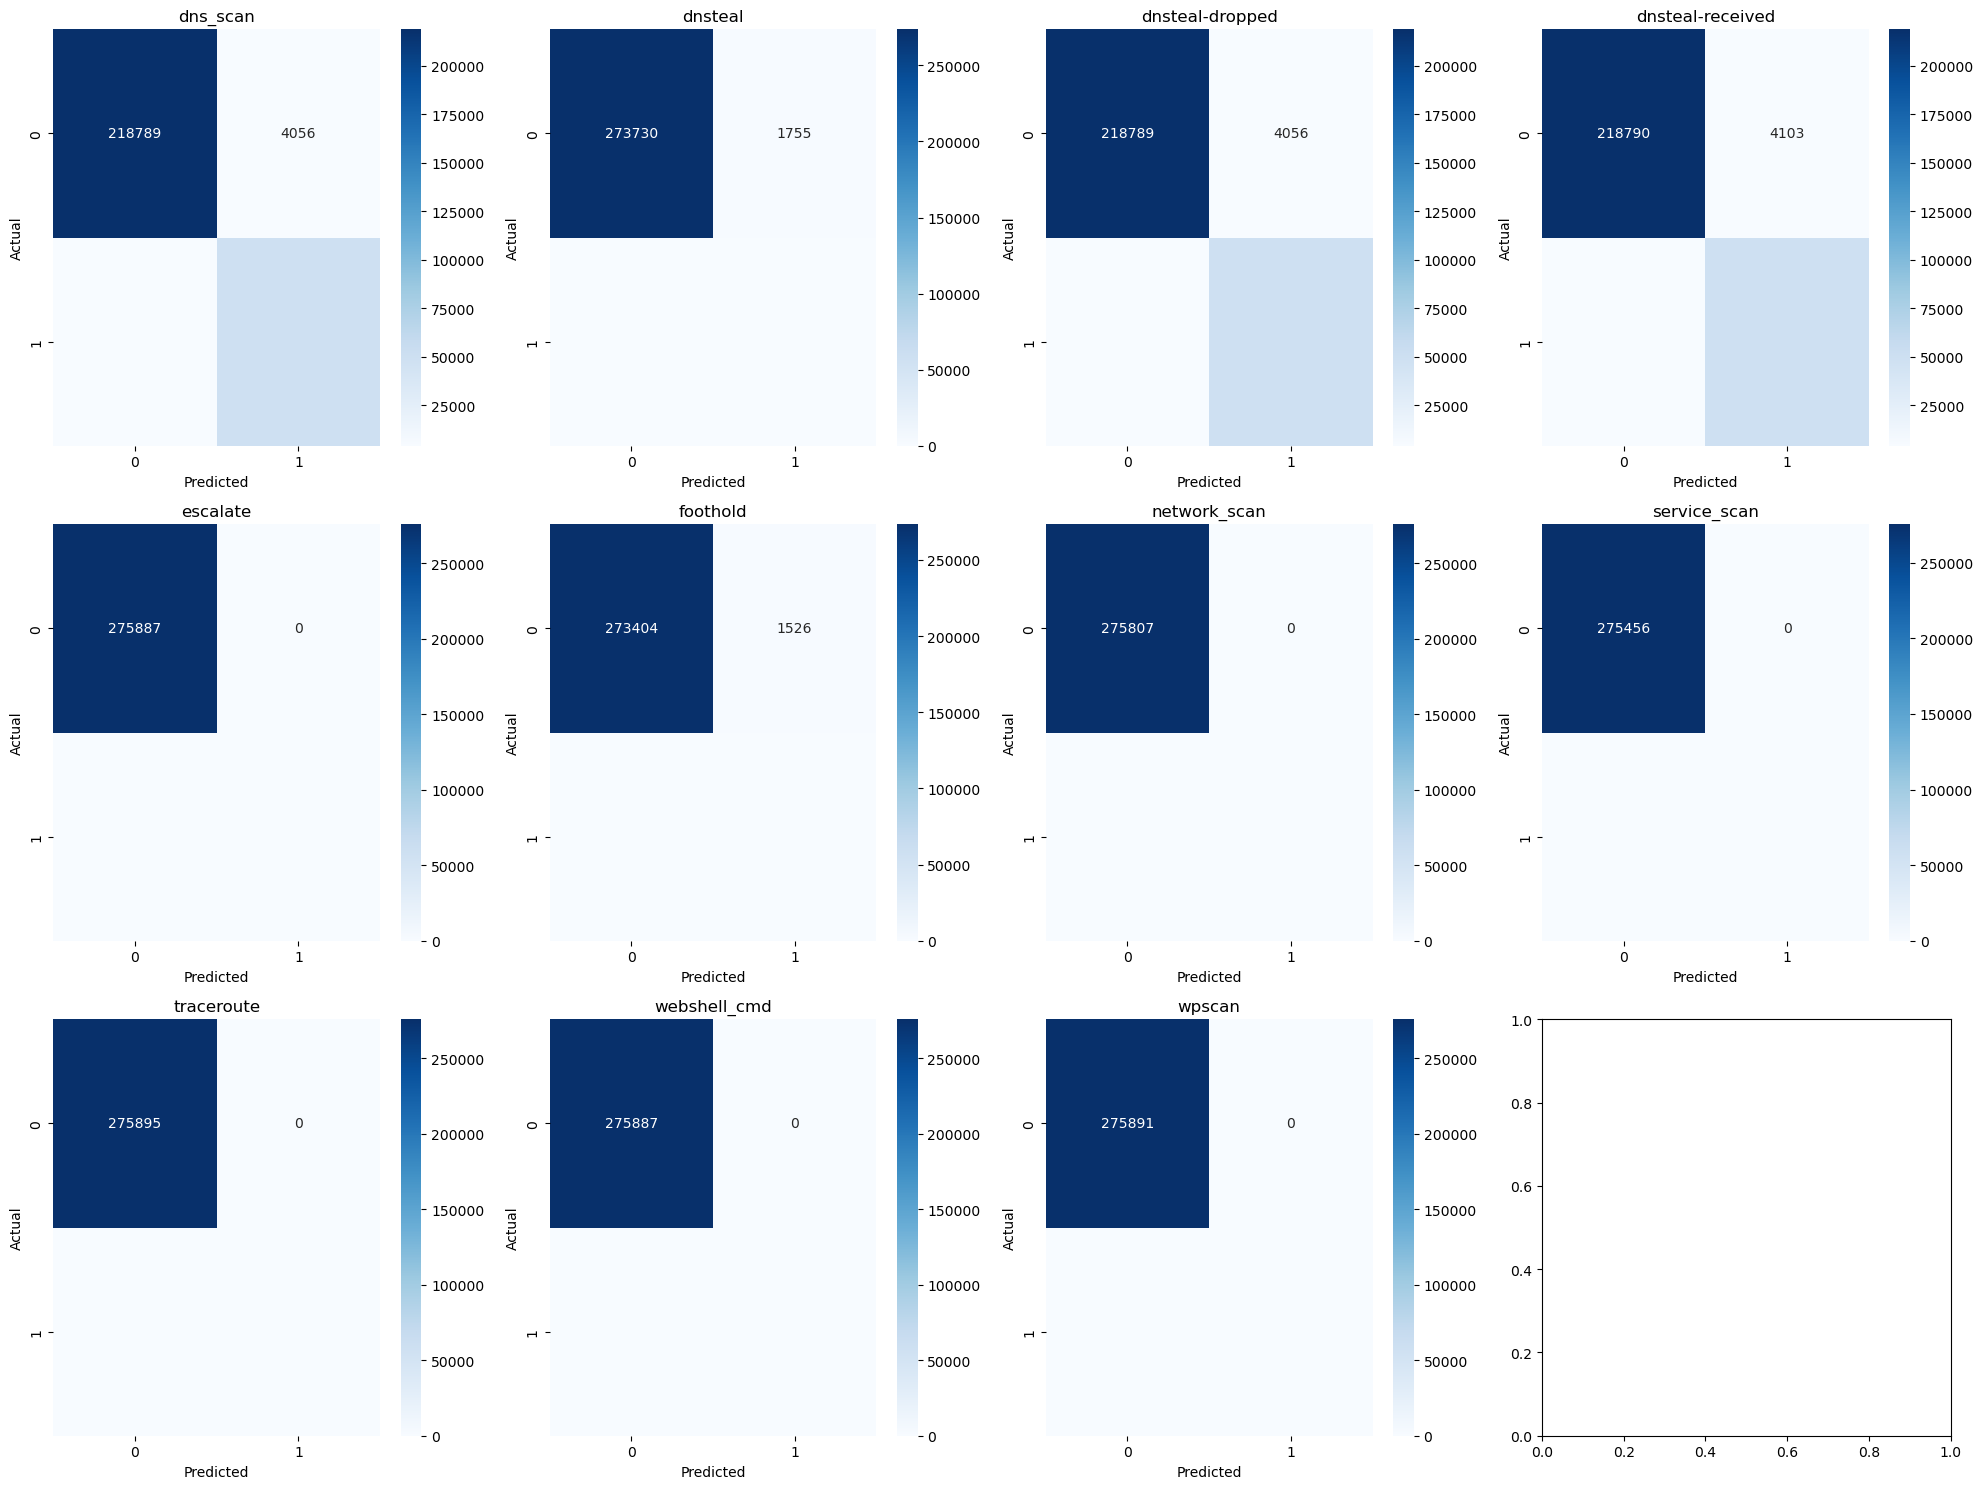

In [27]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate multi-label confusion matrix
mcm = multilabel_confusion_matrix(y_multilabel, y_pred)

# Plot each class's confusion matrix
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i, cm in enumerate(mcm):
    if i < len(df_features_extracted.columns[-11:]):
        sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], 
                    cmap='Blues')
        axes[i].set_title(df_features_extracted.columns[-11:][i])
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [36]:
mcm

array([[[218789,   4056],
        [  4125,  48929]],

       [[273730,   1755],
        [   414,      0]],

       [[218789,   4056],
        [  4125,  48929]],

       [[218790,   4103],
        [  4124,  48882]],

       [[275887,      0],
        [    12,      0]],

       [[273404,   1526],
        [   969,      0]],

       [[275807,      0],
        [    92,      0]],

       [[275456,      0],
        [   443,      0]],

       [[275895,      0],
        [     4,      0]],

       [[275887,      0],
        [    12,      0]],

       [[275891,      0],
        [     8,      0]]], dtype=int64)

TODO: Summarize most important findings

In [28]:
# Extract only the predicted attack related log entries using y_pred and x_test

# Get the indices of the attack related log entries
attack_related_indices = np.where(y_pred[:, 0] == 1)[0]

attack_related_indices.shape

(52985,)

In [31]:
# How many attack related log entries were present in the original dataset?
print("Total attack related log entries in the original dataset: ", len(df_features_extracted[df_features_extracted["true_type"] == 1]))
print("Total attack related log entries predicted: ", len(attack_related_indices))
print("Percentage of attack related log entries predicted: ", len(attack_related_indices) / len(df_features_extracted[df_features_extracted["true_type"] == 1]))
print("Absolute number of attacks missed: ", len(df_features_extracted[df_features_extracted["true_type"] == 1]) - len(attack_related_indices))

Total attack related log entries in the original dataset:  54035
Total attack related log entries predicted:  52985
Percentage of attack related log entries predicted:  0.9805681502729712


In [33]:
# Get the predicted attack related log entries:
df_attack_related = df_raw.iloc[attack_related_indices]

df_attack_related

,message
0,Jan 21 00:00:09 dnsmasq[3468]: query[A] 3x6-.596-.IunWTzebVlyAhhHj*ZfWjOBun1zAf*Wgpq-.YarqcF7oovex5JXZQp35nThgDU1Q3p3lT/-.DM6Vx/vcq3AkrO4Xh2kjojk8RCiDE2wjSv-.gY6ONv8eNmDck8gGwJ8fU3PPctbthfeDZT-.cu...
1,Jan 21 00:00:09 dnsmasq[3468]: forwarded 3x6-.596-.IunWTzebVlyAhhHj*ZfWjOBun1zAf*Wgpq-.YarqcF7oovex5JXZQp35nThgDU1Q3p3lT/-.DM6Vx/vcq3AkrO4Xh2kjojk8RCiDE2wjSv-.gY6ONv8eNmDck8gGwJ8fU3PPctbthfeDZT-.c...
2,Jan 21 00:00:09 dnsmasq[3468]: reply 3x6-.596-.IunWTzebVlyAhhHj*ZfWjOBun1zAf*Wgpq-.YarqcF7oovex5JXZQp35nThgDU1Q3p3lT/-.DM6Vx/vcq3AkrO4Xh2kjojk8RCiDE2wjSv-.gY6ONv8eNmDck8gGwJ8fU3PPctbthfeDZT-.custo...
3,Jan 21 00:00:31 dnsmasq[3468]: query[A] 3x6-.597-.L**fA/ib4pGEIb5*uJ223L5A/pWGilEyrR-.u9lQ3wFEj1tPwCHh73wG6GKKEMkqDT/d*3-.LvX0RzIuTHdNz11Xyw21NB8jaa8CNw7CaC-.yai016WDS1Ypa5Tr/uckb0Hv2k9C1eU7Og-.cu...
4,Jan 21 00:00:31 dnsmasq[3468]: forwarded 3x6-.597-.L**fA/ib4pGEIb5*uJ223L5A/pWGilEyrR-.u9lQ3wFEj1tPwCHh73wG6GKKEMkqDT/d*3-.LvX0RzIuTHdNz11Xyw21NB8jaa8CNw7CaC-.yai016WDS1Ypa5Tr/uckb0Hv2k9C1eU7Og-.c...
...,...
254387,Jan 24 13:52:04 dnsmasq[3468]: query[A] 3x6-.128-.lJ8C99J8/NYSxKbiVkM/W0ECJgAA0j9bgo-.OJoaXhn9d/dIszVYmobyyYncrHztX72PsZ-.GeXgpCmEUzUS0*f8/dMptkZjbgMEK0tE/K-.JImBTfS8XLtMjvFgTmkSHytQ6LcgrMSvqU-.Va...
254388,Jan 24 13:52:04 dnsmasq[3468]: forwarded 3x6-.128-.lJ8C99J8/NYSxKbiVkM/W0ECJgAA0j9bgo-.OJoaXhn9d/dIszVYmobyyYncrHztX72PsZ-.GeXgpCmEUzUS0*f8/dMptkZjbgMEK0tE/K-.JImBTfS8XLtMjvFgTmkSHytQ6LcgrMSvqU-.V...
254389,Jan 24 13:52:09 dnsmasq[3468]: query[A] 3x6-.128-.lJ8C99J8/NYSxKbiVkM/W0ECJgAA0j9bgo-.OJoaXhn9d/dIszVYmobyyYncrHztX72PsZ-.GeXgpCmEUzUS0*f8/dMptkZjbgMEK0tE/K-.JImBTfS8XLtMjvFgTmkSHytQ6LcgrMSvqU-.Va...
254390,Jan 24 13:52:09 dnsmasq[3468]: forwarded 3x6-.128-.lJ8C99J8/NYSxKbiVkM/W0ECJgAA0j9bgo-.OJoaXhn9d/dIszVYmobyyYncrHztX72PsZ-.GeXgpCmEUzUS0*f8/dMptkZjbgMEK0tE/K-.JImBTfS8XLtMjvFgTmkSHytQ6LcgrMSvqU-.V...


In [ ]:
# TODO: CLEAN UP CODE!!!
# TODO: Weiter: attack-related parsen und wichtige features extrahieren. Dann daraus events generieren (time window based wahrscheinlich am sinnvollsten).
# TODO: Diese events mit anderen events (aus den anderern logs) mergen